# Internal Lab 



# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [396]:
import pandas as pd
import numpy as np
petrol_df = pd.read_csv('petrol.csv',skipinitialspace= True)
petrol_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [397]:
print(petrol_df.info()) # no null values
IQR = petrol_df.quantile(0.75) - petrol_df.quantile(0.25) # calculating IQR to detect outliers
Whisker = 1.5 * IQR # whisker
L_whisker = petrol_df.quantile(0.25) - Whisker # Lower bound range
H_whisker = petrol_df.quantile(0.75) + Whisker # upper bound range
petrol_df = petrol_df[~((petrol_df < L_whisker) | (petrol_df > H_whisker))] # Replaces the outliers with na values
print(petrol_df.isna().sum()) # 5 records with outliers
petrol_df.dropna(inplace=True) # remove entire row which contains outliers
petrol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax            48 non-null float64
income         48 non-null int64
highway        48 non-null int64
dl             48 non-null float64
consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
None
tax            2
income         0
highway        2
dl             1
consumption    2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 47
Data columns (total 5 columns):
tax            43 non-null float64
income         43 non-null int64
highway        43 non-null float64
dl             43 non-null float64
consumption    43 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 47
Data columns (total 5 columns):
tax            43 non-null float64
income         43 non-null int64
highway        43 non-null float64
dl             43 non-null float64
consumption    43 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


(5.0, 0.0)

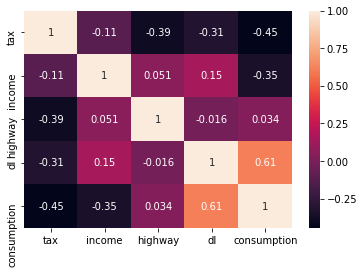

In [398]:
petrol_df_1 = pd.DataFrame.copy(petrol_df)
petrol_df_1.info()
ax = sns.heatmap(petrol_df_1.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Postive correlation between dl(proportion of drivers) and Consumption --> +0.70
# Negative correlation between tax and consumption --> -0.45

In [399]:
# dropping highway and income columns which has correlation +/- 0.4
petrol_df_1.drop(petrol_df_1.loc[:, (petrol_df_1.corr()['consumption'].between(-0.4, 0.4))],axis =1, inplace = True)
print(petrol_df_1.shape)

(43, 3)


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [400]:
# Divide the Data in to Target and Features
y = petrol_df_1['consumption'] # Target Variable
X = petrol_df_1.drop(['consumption'],axis=1) # Independent Variables

In [401]:
from sklearn import preprocessing
X = preprocessing.scale(X)
X = pd.DataFrame(X)

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state = 10)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [403]:
from sklearn import linear_model
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [404]:
model_df_1 = pd.DataFrame(regr.coef_).transpose()
model_df_1.columns = petrol_df_1.columns[:-1]
model_df_1['constant'] = regr.intercept_
#Linear Regression equation is as follows,
for idx, col_name in enumerate(model_df_1.columns[:-1]):
    print('The coefficient for {} is {}'.format(col_name, regr.coef_[idx]))
model_df_1

The coefficient for tax is -21.489086956160875
The coefficient for dl is 47.13210348769698


,tax,dl,constant
0,-21.489087,47.132103,568.167555


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [405]:
import math
#Equation for Multiple linear regession for tax and Dl is f(consumption) = -21.489087*tax + 41.132103 * d1 + 568.167555
r2_score= regr.score(X_test,y_test)
mse = np.mean((regr.predict(X_test)-y_test)**2)
rmse = math.sqrt(mse)
y_pred = regr.predict(X_test)
print(y_pred)
print('r-squared',r2_score)
print('rmse',r2_score)

[486.60535214 533.80613461 542.01233527 526.17742144 657.59925272
 586.38654137 548.03019266 678.63019359 594.95744666]
r-squared 0.6353615496819156
rmse 0.6353615496819156


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [406]:
# Divide the Data in to Target and Features Target variable 'Consumption' to be passed
petrol_df_2 = pd.DataFrame.copy(petrol_df)
y = petrol_df_2['consumption'] # Target Variable
X = petrol_df_2.drop(['consumption'],axis=1) # Independent Variables

In [407]:
#scale the dimensions using Zscores
from sklearn import preprocessing
X = preprocessing.scale(X)
X = pd.DataFrame(X)

In [408]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state = 10)

In [409]:
from sklearn import linear_model
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [410]:
model_df_2 = pd.DataFrame(regr.coef_).transpose()
model_df_2.columns = petrol_df_2.columns[:-1]
model_df_2['constant'] = regr.intercept_
#Linear Regression equation is as follows,
for idx, col_name in enumerate(model_df_2.columns[:-1]):
    print('The coefficient for {} is {}'.format(col_name, regr.coef_[idx]))
model_df_2

The coefficient for tax is -30.224316379796132
The coefficient for income is -40.92498458469183
The coefficient for highway is -6.633501569937856
The coefficient for dl is 47.565670661416824


,tax,income,highway,dl,constant
0,-30.224316,-40.924985,-6.633502,47.565671,568.889001


In [411]:
import math
#Equation for Multiple linear regession for tax,income,highway and Dl is 
# f(consumption) = -30.224316 * tax - 40.924985 * income -6.633502*highway+47.565671*dl + 568.889001
r2_score= regr.score(X_test,y_test)
mse = np.mean((regr.predict(X_test)-y_test)**2)
rmse = math.sqrt(mse)
y_pred = regr.predict(X_test)
print(y_pred)
print('r-squared',r2_score)
print('rmse',r2_score)

[536.62781002 503.52858489 586.38778768 496.04527382 693.1357544
 605.45655697 567.81103646 651.26883362 544.96539447]
r-squared 0.8050813179069416
rmse 0.8050813179069416


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

##### The residual mean sum of squares/R-squared value has increased while using all the 4 independent variables compared to using two independent variables which has strong correlation with the target variable consumption, this may be due to collinearity between the independent variables Tax and income(-0.11), Tax and highway(-0.39), Tax and dl(-0.45) all of them are negatively correlated i.e. Petrol Tax increase will have negative impact in income, number of miles paved in highway and proprotion of drivers

#### The variability of the data increased when using multiple independent variables and also reduced the accuracy of the predictions. It is a good practice to drop the independent variables which has weak correlation with the target variable, as this reduces the overall accuracy of prediction. Howver, as a word of caution, it is critical to take this decision only with the advice from the domain expert

#### R2 for Model 1 = 0.63 better than R2 for model 2 = 0.80, lower the R2, better will be the model